## **Mengimport module**

In [101]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import mutual_info_classif


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## **Membaca Data**

In [102]:
data = pd.read_csv("../Data/diabetes_data.csv")
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Preprocessing Data**

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [104]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [105]:
##Mengecek nilai kosong (missing value)
data.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [106]:
##Menghapus data duplikat
data.drop_duplicates()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [107]:
##Mengubah tipe kolom
variabel_numerik = data.columns.difference(['BMI', 'MentHlth', 'PhysHlth'])
data[variabel_numerik] = data[variabel_numerik].astype('category')
data[variabel_numerik] = data[variabel_numerik].apply(lambda x: x.cat.codes)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  int8   
 1   Sex                   70692 non-null  int8   
 2   HighChol              70692 non-null  int8   
 3   CholCheck             70692 non-null  int8   
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  int8   
 6   HeartDiseaseorAttack  70692 non-null  int8   
 7   PhysActivity          70692 non-null  int8   
 8   Fruits                70692 non-null  int8   
 9   Veggies               70692 non-null  int8   
 10  HvyAlcoholConsump     70692 non-null  int8   
 11  GenHlth               70692 non-null  int8   
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  int8   
 15  Stroke             

In [109]:
binary_cols = ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 
               'Stroke', 'HighBP', 'Diabetes']
data[binary_cols] = data[binary_cols].astype('category')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   70692 non-null  category
 1   Sex                   70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  float64 
 5   Smoker                70692 non-null  category
 6   HeartDiseaseorAttack  70692 non-null  category
 7   PhysActivity          70692 non-null  category
 8   Fruits                70692 non-null  category
 9   Veggies               70692 non-null  category
 10  HvyAlcoholConsump     70692 non-null  category
 11  GenHlth               70692 non-null  category
 12  MentHlth              70692 non-null  float64 
 13  PhysHlth              70692 non-null  float64 
 14  DiffWalk              70692 non-null  category
 15  St

In [111]:
##Menyeleksi variabel (feature selection)
X = data.drop(["Diabetes"], axis = 1)
y = data["Diabetes"]

estimator = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=100),
      scoring='accuracy')

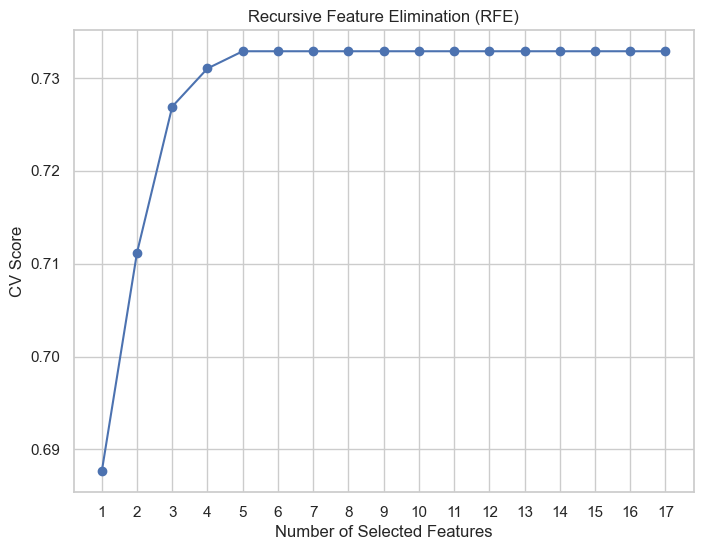

The optimal number of features: 5


In [112]:
##Plot RFE
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [113]:
##Prediktor terpilih
selected_features = X.columns[rfecv.support_]
X_selected = X[selected_features]

In [114]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       70692 non-null  category
 1   HighChol  70692 non-null  category
 2   BMI       70692 non-null  float64 
 3   GenHlth   70692 non-null  category
 4   HighBP    70692 non-null  category
dtypes: category(4), float64(1)
memory usage: 829.2 KB


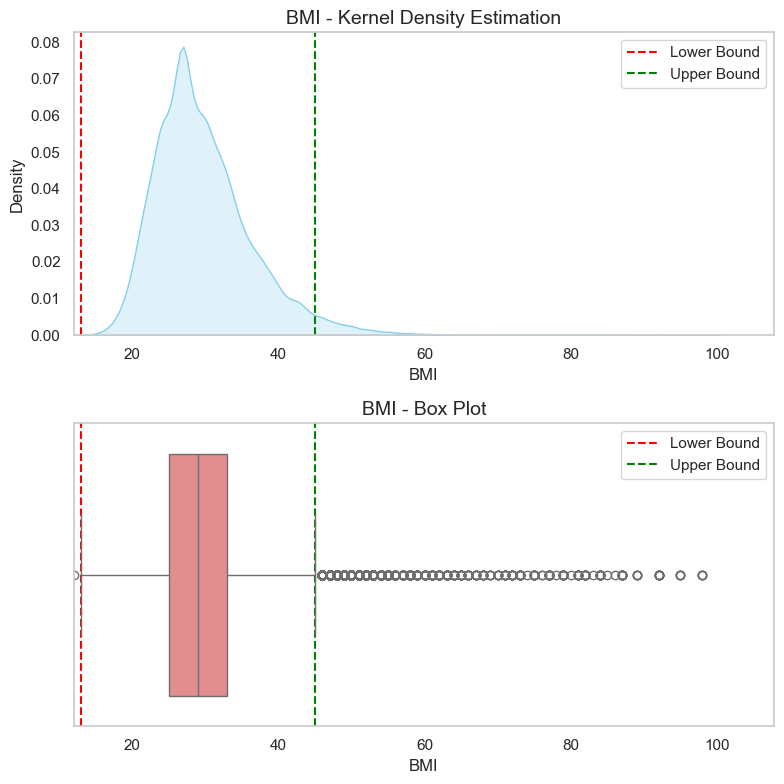

In [115]:
##Mengecek outlier
numerical_columns = X_selected.select_dtypes(include=['float64', 'int64']).columns

for i in numerical_columns:
    q25, q75 = np.percentile(data[i], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5

    plt.figure(figsize=(8, 8))

    plt.subplot(211)
    plt.xlim(data[i].min(), data[i].max() * 1.1)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
    sns.kdeplot(data[i], fill=True, color='skyblue')
    plt.legend()
    plt.title(f'{i} - Kernel Density Estimation', fontsize=14)
    plt.grid(False) 

    plt.subplot(212)
    plt.xlim(data[i].min(), data[i].max() * 1.1)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
    sns.boxplot(x=data[i], color='lightcoral')
    plt.legend()
    plt.title(f'{i} - Box Plot', fontsize=14)
    plt.grid(False) 
    
    plt.tight_layout() 
    plt.show()


In [116]:
##Menghapus outlier
columns_to_check = ['BMI']

for i in columns_to_check:
    q25, q75 = np.percentile(data[i], [25, 75])
    iqr = q75 - q25
    
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5
    
    data.loc[data[i] < lower_bound, i] = lower_bound
    data.loc[data[i] > upper_bound, i] = upper_bound

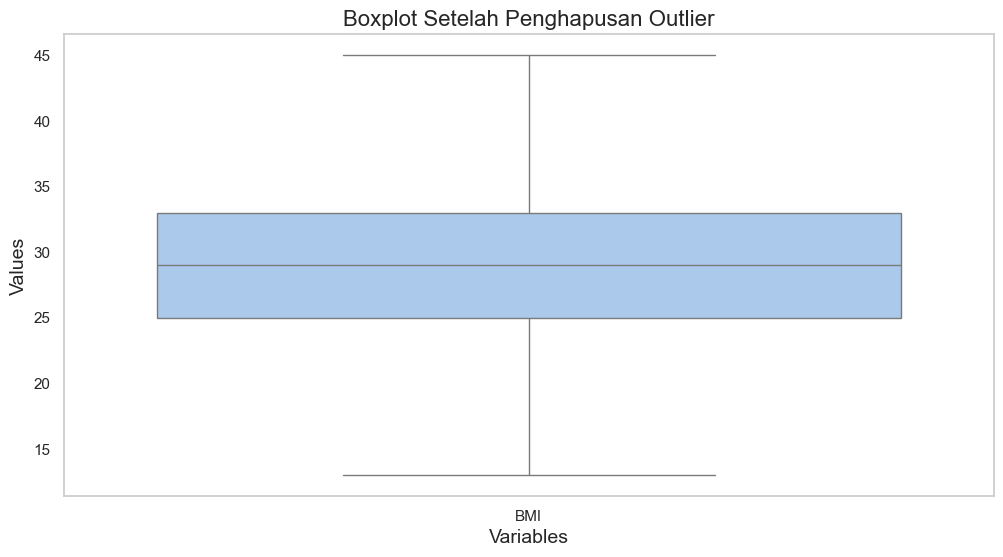

In [117]:
##Mengecek outlier setelah dihapus
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  

boxplot = sns.boxplot(data=X_selected, palette='pastel', showfliers=False)
plt.title('Boxplot Setelah Penghapusan Outlier', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(False)

In [118]:
data['Diabetes'].value_counts()

Diabetes
0    35346
1    35346
Name: count, dtype: int64

In [119]:
##Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [120]:
X_train.head()

,Age,HighChol,BMI,GenHlth,HighBP
47977,9,0,29.0,1,1
2676,6,1,24.0,2,0
35637,10,0,42.0,2,1
52420,9,1,30.0,2,1
12445,5,0,35.0,2,1


In [121]:
X_test.head()

,Age,HighChol,BMI,GenHlth,HighBP
57608,9,1,53.0,3,1
18474,11,1,31.0,2,1
47268,12,1,18.0,2,1
31419,6,0,21.0,0,0
56545,6,1,38.0,2,1


In [122]:
y_train.head()

47977    1
2676     0
35637    1
52420    1
12445    0
Name: Diabetes, dtype: category
Categories (2, int8): [0, 1]

In [123]:
y_test.head()

57608    1
18474    0
47268    1
31419    0
56545    1
Name: Diabetes, dtype: category
Categories (2, int8): [0, 1]

In [124]:
##Menstandarisasi data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Melakukan Klasifikasi**

In [125]:
xg = XGBClassifier(n_estimators=350)
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)
print(classification_report(y_test, xg_preds))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      7070
           1       0.72      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [126]:
gb = GradientBoostingClassifier(
    n_estimators=20,  
    learning_rate=0.5,  
    max_features=2,  
    max_depth=2,  
    random_state=42  
)

# Fit the model with the training data
gb.fit(X_train, y_train)

# Make predictions on the validation/test data
predictions = gb.predict(X_test)

# Print the classification report to evaluate the performance
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, predictions))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      7070
           1       0.73      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



## **Membuat Confussion Matrix**

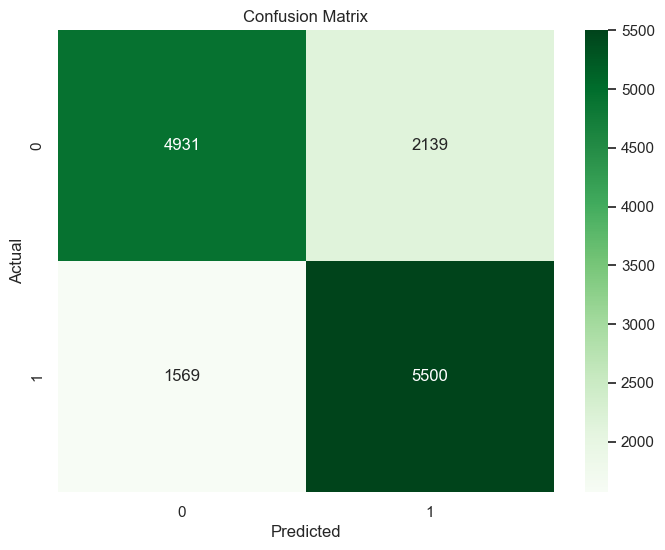

In [127]:
##Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, xg_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
